In [2]:
import os 
os.chdir('../../../../')
print("Current working directory is now: ", os.getcwd())

import pandas as pd 
import numpy as np
import csv
import utils.baseline_functions as base
import stumps
import RiskSLIM as slim

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_auc_score

# restore saved variables
%store -r summary_property6_KY_interpret

Current working directory is now:  C:\Users\binha\Documents\Duke\Cynthia Research\psa-analysis - test


C:\Users\binha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



no stored variable summary_property6_KY_interpret


### CART & EBM

In [3]:
### load data
data = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY data/kentucky_data.csv")
data = data.drop(['fta_risk_score_raw','nca_risk_score_raw','pvf_risk_score_raw', 
                  'fta_calc', 'nca_calc', 'pvf_calc'], axis=1)
x = data.loc[:,:'current_violence']
y = data['recid_property_six_month'].values

In [4]:
#### CART
depth = [4,5]
cart_summary = base.CART(X=x,
                         Y=y,
                         depth=depth,
                         seed=816)

#### EBM
estimators = [60]
depth = [2,3]
learning_rate = [0.5]
ebm_summary = base.EBM(X=x,
                       Y=y,
                       learning_rate=learning_rate,
                       depth=depth,
                       estimators=estimators,
                       seed =816)

model_id, score_thresholds 0 {'rank_abs': [0]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [3]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [0]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [2]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [3]}
get_disparity_predefined_group()


C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply



model_id, score_thresholds 0 {'rank_abs': [1]}
get_disparity_predefined_group()


C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply



model_id, score_thresholds 0 {'rank_abs': [4]}
get_disparity_predefined_group()


C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply



model_id, score_thresholds 0 {'rank_abs': [0]}
get_disparity_predefined_group()


C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply



model_id, score_thresholds 0 {'rank_abs': [0]}
get_disparity_predefined_group()


C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply

C:\Users\binha\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning:

overflow encountered in multiply



model_id, score_thresholds 0 {'rank_abs': [13275]}
get_disparity_predefined_group()


In [ ]:
#### EBM
estimators = [60]
depth = [2,3]
learning_rate = [0.5]
ebm_summary = base.EBM(X=x,
                       Y=y,
                       learning_rate=learning_rate,
                       depth=depth,
                       estimators=estimators,
                       seed =816)

model_id, score_thresholds 0 {'rank_abs': [1]}
get_disparity_predefined_group()


model_id, score_thresholds 0 {'rank_abs': [0]}
get_disparity_predefined_group()


model_id, score_thresholds 0 {'rank_abs': [0]}
get_disparity_predefined_group()


model_id, score_thresholds 0 {'rank_abs': [0]}
get_disparity_predefined_group()


In [5]:
np.mean(cart_summary['holdout_test_auc']), np.mean(cart_summary['auc_diffs'])

(0.8345513451217756, 0.021337278718561968)

In [6]:
np.mean(ebm_summary['holdout_test_auc']), np.mean(ebm_summary['auc_diffs'])

(0.8019609085216303, 0.019184157109442813)

## Lasso Stumps

In [7]:
## load whole data
data = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY data/kentucky_stumps.csv")
X_stumps, Y_stumps = data.loc[:,:'current_violence>=1'], data['recid_property_six_month'].values
Y_stumps[Y_stumps == -1] = 0
cols = X_stumps.columns[3:]

## load train & test data
train_stumps = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY data/kentucky_train_stumps.csv")
test_stumps = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY data/kentucky_test_stumps.csv")

X_train_stumps, Y_train_stumps = train_stumps.loc[:,:'current_violence>=1'], train_stumps['recid_property_six_month'].values
X_test_stumps, Y_test_stumps = test_stumps.loc[:,:'current_violence>=1'], test_stumps['recid_property_six_month'].values

Y_train_stumps[Y_train_stumps == -1] = 0
Y_test_stumps[Y_test_stumps == -1] = 0

#### Nested Cross Validation

In [8]:
stump_summary = stumps.stump_cv(X = X_stumps, 
                                Y = Y_stumps, 
                                columns=cols, 
                                c_grid={'C': [0.007, 0.005, 0.003]}, 
                                seed = 816)

model_id, score_thresholds 0 {'rank_abs': [9885]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [10066]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [10373]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [10276]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [10566]}
get_disparity_predefined_group()


In [9]:
stump_summary['best_params'], np.mean(stump_summary['holdout_test_auc']), np.mean(stump_summary['auc_diffs'])

([{'C': 0.005}, {'C': 0.007}, {'C': 0.007}, {'C': 0.007}, {'C': 0.007}],
 0.866805425226354,
 0.013694813594901278)

##### Best Stump Model

In [16]:
best_stump_model = stumps.stump_model(X_train_stumps, Y_train_stumps, 
                                      X_test_stumps, Y_test_stumps, 
                                      c=0.002, columns=cols, seed=816)

##### Prediction Table

In [17]:
stumps.stump_table(best_stump_model['coefs'], 
                   best_stump_model['features'], 
                   best_stump_model['intercept'], 
                   best_stump_model['dictionary'])

+-----------------------------------+----------------+
| Features                          | Score          |
|====================================================|
| sex                               | 4.8            |
| age_at_current_charge<=18         | 58.2           |
| age_at_current_charge<=19         | 32.0           |
| age_at_current_charge<=24         | 0.2            |
| age_at_current_charge<=38         | 28.8           |
| p_arrest>=1                       | -58.9          |
| p_arrest>=2                       | 62.3           |
| p_arrest>=3                       | 32.7           |
| p_arrest>=4                       | 30.1           |
| p_arrest>=5                       | 10.7           |
| p_arrest>=6                       | 11.1           |
| p_arrest>=7                       | 0.7            |
| p_arrest>=8                       | 0.6            |
| p_arrest>=9                       | 1.0            |
| p_charges>=1                      | -49.3          |
| p_charge

In [18]:
stump_summary = stumps.stump_cv(X = X_stumps, 
                                Y = Y_stumps, 
                                columns=cols, 
                                c_grid={'C': [0.002]}, 
                                seed = 816)

model_id, score_thresholds 0 {'rank_abs': [8277]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [9581]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [9488]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [9851]}
get_disparity_predefined_group()
model_id, score_thresholds 0 {'rank_abs': [9342]}
get_disparity_predefined_group()


In [19]:
stump_summary['best_params'], np.mean(stump_summary['holdout_test_auc']), np.mean(stump_summary['auc_diffs'])

([{'C': 0.002}, {'C': 0.002}, {'C': 0.002}, {'C': 0.002}, {'C': 0.002}],
 0.8638133021913941,
 0.008385045062641238)

##### Stumps Visualizations

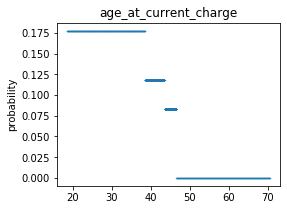

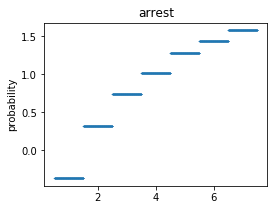

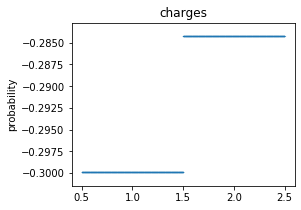

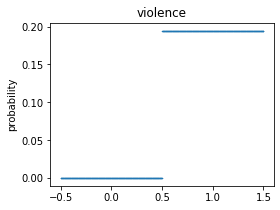

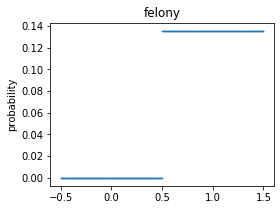

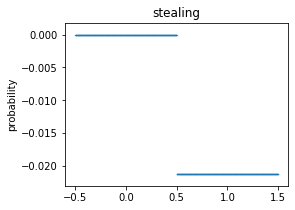

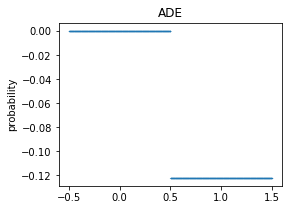

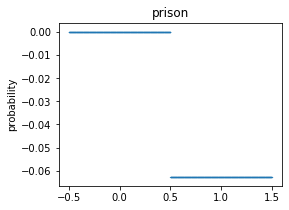

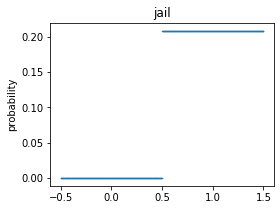

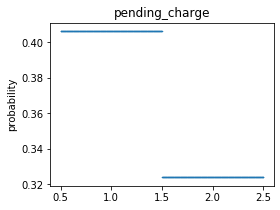

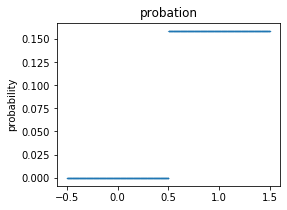

In [20]:
stumps.stump_plots(best_stump_model['features'], best_stump_model['coefs'])

### Arnold PSA

In [20]:
### load data
data = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY data/kentucky_data.csv")
X_arnold_raw = data['nca_risk_score_raw'].values
X_arnold_calc = data['nca_calc'].values
Y_arnold = data['recid_property_six_month'].values

In [21]:
## set up cross validation
cv = KFold(n_splits=5,shuffle=True,random_state=816)
raw_auc = []
calc_auc = []

## raw score
i = 1
for train, test in cv.split(X_arnold_raw, Y_arnold):
    y_pred_raw, y_pred_calc, y_test = X_arnold_raw[test], X_arnold_calc[test], Y_arnold[test]
    raw_auc.append(roc_auc_score(y_test, y_pred_raw))
    calc_auc.append(roc_auc_score(y_test, y_pred_calc))
    i+=1 

## RiskSLIM

In [22]:
## load stumps data
data = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY data/kentucky_stumps.csv")
x, y = data.loc[:,:'current_violence>=1'], data['recid_property_six_month'].values
cols = x.columns[3:]

In [23]:
## train on best param chosen by Lasso Stumps from above
x_train = x.copy().drop(['race', 'person_id', 'screening_date'], axis=1)
lasso = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.002, random_state=816).fit(x_train,y)
selected_features = cols[lasso.coef_[0] != 0].tolist()
len(selected_features)

28

In [24]:
### Subset features
if 'sex' in selected_features:
    selected_features = ['recid_property_six_month', 'person_id', 'screening_date', 'race'] + selected_features
    indicator = 1
else:
    selected_features = ['recid_property_six_month', 'person_id', 'screening_date', 'race', 'sex'] + selected_features
    indicator = 0

sub_data = data[selected_features]
sub_X, sub_Y = sub_data.iloc[:,1:], sub_data.iloc[:,0].values
sub_X.insert(0, '(Intercept)', 1)

In [25]:
riskslim_summary = slim.risk_cv(X=sub_X, 
                                Y=sub_Y, 
                                indicator = indicator,
                                y_label='recid_property6', 
                                max_coef=20, 
                                max_coef_number=10, 
                                max_runtime=200, 
                                c=1e-5, 
                                seed=816)

setting c0 = 0.0 to ensure that intercept is not penalized
09/11/19 @ 10:48 PM | 1221 rows in lookup table
09/11/19 @ 10:48 PM | ------------------------------------------------------------
09/11/19 @ 10:48 PM | runnning initialization procedure
09/11/19 @ 10:48 PM | ------------------------------------------------------------
09/11/19 @ 10:48 PM | CPA produced 2 cuts
09/11/19 @ 10:48 PM | running naive rounding on 139 solutions
09/11/19 @ 10:48 PM | best objective value: 0.0241
09/11/19 @ 10:48 PM | rounding produced 5 integer solutions
09/11/19 @ 10:48 PM | best objective value is 0.0248
09/11/19 @ 10:48 PM | running sequential rounding on 139 solutions
09/11/19 @ 10:48 PM | best objective value: 0.0241
09/11/19 @ 10:48 PM | sequential rounding produced 5 integer solutions
09/11/19 @ 10:48 PM | best objective value: 0.0245
09/11/19 @ 10:48 PM | polishing 10 solutions
09/11/19 @ 10:48 PM | best objective value: 0.0245
09/11/19 @ 10:48 PM | polishing produced 5 integer solutions
09/11/

Lazy constraint(s) or lazy constraint callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling non-linear reductions (CPX_PARAM_PRELINEAR) in presolve.
         Disabling repeat represolve because of lazy constraint/incumbent callback.
09/11/19 @ 10:48 PM | adding 261 initial cuts
1 of 1 MIP starts provided solutions.
MIP start 'mip_start_0' defined initial solution with objective 0.0245.
Tried aggregator 1 time.
Reduced MIP has 30 rows, 60 columns, and 115 nonzeros.
Reduced MIP has 28 binaries, 30 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.02 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.02 sec. (0.04 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variab

 133968 44831        0.0240    12        0.0245        0.0240   585427    2.20%          rho_13 D 133968 133967     66
 135900 45435        0.0240    12        0.0245        0.0240   594644    2.20%          rho_13 D 135900 135899     52
 137932 46005        0.0240    10        0.0245        0.0240   604126    2.20%          rho_13 D 137932 137587     25
 140192 46676        cutoff              0.0245        0.0240   613405    2.20%          rho_26 U 140192 140190     31
 142339 47205        0.0240     8        0.0245        0.0240   622589    2.20%          rho_18 D 142339 142336     44
 144469 47498        cutoff              0.0245        0.0240   631673    2.20%          rho_16 U 144469 144468     78
Elapsed time = 41.45 sec. (50809.09 ticks, tree = 15.60 MB, solutions = 1)
 146609 47794        cutoff              0.0245        0.0240   640789    2.20%          rho_16 U 146609 146608     88
 148787 48107        0.0240     6        0.0245        0.0240   650137    2.20%          rho

 363780 118856        0.0240     5        0.0244        0.0240  1682512    1.92%           rho_7 D 363780 363779     51
 371600 121467        0.0242     8        0.0244        0.0240  1713838    1.92%          rho_26 D 371600 371599     63
 379293 123305        0.0242     7        0.0244        0.0240  1749307    1.92%          rho_16 D 379293 379291     64
 387080 125041        0.0240     9        0.0244        0.0240  1784106    1.92%          rho_13 D 387080 387079     45
Elapsed time = 121.48 sec. (167267.82 ticks, tree = 41.04 MB, solutions = 5)
 394070 126956        0.0240    10        0.0244        0.0240  1820074    1.92%           rho_0 D 394070 394059     63
 401262 130571        0.0243    13        0.0244        0.0240  1863150    1.92%           rho_0 U 401262 401261     54
 407350 133957        0.0240    13        0.0244        0.0240  1901168    1.92%          rho_13 D 407350 407349     74
 415618 135998        0.0243     3        0.0244        0.0240  1936580    1.92%   

Lazy constraint(s) or lazy constraint callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling non-linear reductions (CPX_PARAM_PRELINEAR) in presolve.
         Disabling repeat represolve because of lazy constraint/incumbent callback.
09/11/19 @ 10:52 PM | adding 252 initial cuts
1 of 1 MIP starts provided solutions.
MIP start 'mip_start_0' defined initial solution with objective 0.0255.
Tried aggregator 1 time.
Reduced MIP has 30 rows, 60 columns, and 115 nonzeros.
Reduced MIP has 28 binaries, 30 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.02 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.04 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variab

 112037 38573        cutoff              0.0255        0.0249   503506    2.11%          rho_17 U 112037 112036     38
 113961 38991        0.0249     8        0.0255        0.0249   511501    2.11%           rho_7 U 113961 113960     54
 115847 39344        0.0252     6        0.0255        0.0249   519459    2.11%          rho_17 D 115847 115845     55
 117674 39644        0.0251     4        0.0255        0.0249   526834    2.11%          rho_17 D 117674 117672     87
 119497 40028        0.0250     6        0.0255        0.0249   534793    2.11%          rho_14 D 119497 119496     93
 121325 40367        0.0252     5        0.0255        0.0249   542482    2.11%          rho_17 U 121325 121324     84
Elapsed time = 42.33 sec. (50801.13 ticks, tree = 14.17 MB, solutions = 1)
 123151 40688        0.0250    12        0.0255        0.0249   549959    2.11%           rho_0 D 123151 123138     94
 124995 41044        0.0252     5        0.0255        0.0249   557674    2.11%           rh

 329711 113127        0.0251    11        0.0255        0.0249  1539935    2.11%          rho_17 D 329711 329709     82
 336072 115845        0.0252    16        0.0255        0.0249  1576157    2.11%           rho_4 D 336072 336071     58
Elapsed time = 103.11 sec. (168140.75 ticks, tree = 40.23 MB, solutions = 1)
 342064 118346        0.0251     9        0.0255        0.0249  1613956    2.11%           rho_2 U 342064 341942     60
 348124 120685        0.0252    13        0.0255        0.0249  1654148    2.11%           rho_4 D 348124 348123     59
 354544 122669        0.0250     8        0.0255        0.0249  1689624    2.11%          rho_25 D 354544 354543     59
 361085 124148        0.0253     7        0.0255        0.0249  1723002    2.11%          rho_16 D 361085 361083     88
 367655 125690        0.0250    12        0.0255        0.0249  1755813    2.11%          rho_13 D 367655 367654     58
 374108 128632        0.0249     3        0.0255        0.0249  1791125    2.11%   

model_id, score_thresholds 0 {'rank_abs': [0]}
get_disparity_predefined_group()
setting c0 = 0.0 to ensure that intercept is not penalized
09/11/19 @ 10:55 PM | 1221 rows in lookup table
09/11/19 @ 10:55 PM | ------------------------------------------------------------
09/11/19 @ 10:55 PM | runnning initialization procedure
09/11/19 @ 10:55 PM | ------------------------------------------------------------
09/11/19 @ 10:55 PM | CPA produced 2 cuts
09/11/19 @ 10:55 PM | running naive rounding on 150 solutions
09/11/19 @ 10:55 PM | best objective value: 0.0255
09/11/19 @ 10:55 PM | rounding produced 5 integer solutions
09/11/19 @ 10:55 PM | best objective value is 0.0258
09/11/19 @ 10:55 PM | running sequential rounding on 150 solutions
09/11/19 @ 10:55 PM | best objective value: 0.0255
09/11/19 @ 10:55 PM | sequential rounding produced 6 integer solutions
09/11/19 @ 10:55 PM | best objective value: 0.0258
09/11/19 @ 10:55 PM | polishing 11 solutions
09/11/19 @ 10:55 PM | best objective v

Lazy constraint(s) or lazy constraint callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling non-linear reductions (CPX_PARAM_PRELINEAR) in presolve.
         Disabling repeat represolve because of lazy constraint/incumbent callback.
09/11/19 @ 10:55 PM | adding 251 initial cuts
1 of 1 MIP starts provided solutions.
MIP start 'mip_start_0' defined initial solution with objective 0.0258.
Tried aggregator 1 time.
Reduced MIP has 30 rows, 60 columns, and 115 nonzeros.
Reduced MIP has 28 binaries, 30 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.02 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.04 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variab

 104636 46519        0.0252    10        0.0257        0.0252   455004    2.22%          rho_13 U 104636 100188     59
 106705 47459        cutoff              0.0257        0.0252   462164    2.22%          rho_16 U 106705 106703     87
 108798 48439        0.0252    12        0.0257        0.0252   469326    2.22%          rho_13 D 108798 108797     67
 110865 49421        0.0255     6        0.0257        0.0252   476479    2.22%          rho_15 U 110865 110863     57
 112824 50290        0.0254     3        0.0257        0.0252   484553    2.22%          rho_19 U 112824 112823     62
 114723 51126        0.0252    10        0.0257        0.0252   493096    2.22%          rho_13 U 114723 114712     60
Elapsed time = 23.17 sec. (49860.39 ticks, tree = 17.62 MB, solutions = 2)
 116743 51901        0.0252    12        0.0257        0.0252   500746    2.22%          rho_13 D 116743 116742     76
 118838 52643        0.0256     7        0.0257        0.0252   507417    2.22%           rh

 324075 129994        0.0253     6        0.0257        0.0252  1427305    2.22%           rho_4 D 324075 324073     46
 330005 133538        0.0252    11        0.0257        0.0252  1461883    2.22%           rho_0 U 330005 330004     79
Elapsed time = 69.92 sec. (167191.42 ticks, tree = 48.80 MB, solutions = 2)
 335244 136979        0.0253    10        0.0257        0.0252  1490928    2.22%           rho_5 D 335244 335242     71
 340670 140299        0.0252    14        0.0257        0.0252  1518218    2.22%          rho_13 D 340670 340669     74
 345826 143231        0.0255     3        0.0257        0.0252  1547806    2.22%           rho_0 D 345826 345824     58
 351757 146096        cutoff              0.0257        0.0252  1578742    2.22%          rho_18 U 351757 351756     50
 356771 149781        0.0252    10        0.0257        0.0252  1609403    2.22%           rho_0 D 356771 356769     33
 361566 152241        0.0257     1        0.0257        0.0252  1643995    2.22%    

Sequential b&c:
  Real time             =  199.95 sec. (401790.17 ticks)
                          ------------
Total (root+branch&cut) =  200.03 sec. (401791.66 ticks)
+----------------------------------------------+------------------+-----------+
| Pr(Y = +1) = 1.0/(1.0 + exp(-(-7 + score))   |                  |           |
| ============================================ | ================ | ========= |
| p_property>=1                                |         2 points |   + ..... |
| age_at_current_charge<=19                    |         1 points |   + ..... |
| p_arrest>=2                                  |         1 points |   + ..... |
| p_arrest>=10                                 |         1 points |   + ..... |
| p_pending_charge>=1                          |         1 points |   + ..... |
| ============================================ | ================ | ========= |
| ADD POINTS FROM ROWS 1 to 5                  |            SCORE |   = ..... |
+------------------------------

Lazy constraint(s) or lazy constraint callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling non-linear reductions (CPX_PARAM_PRELINEAR) in presolve.
         Disabling repeat represolve because of lazy constraint/incumbent callback.
09/11/19 @ 10:59 PM | adding 253 initial cuts
1 of 1 MIP starts provided solutions.
MIP start 'mip_start_0' defined initial solution with objective 0.0256.
Tried aggregator 1 time.
Reduced MIP has 30 rows, 60 columns, and 115 nonzeros.
Reduced MIP has 28 binaries, 30 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.02 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.04 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variab

 126371 47063        0.0251     5        0.0255        0.0250   576848    2.05%           rho_7 D 126371 126369     64
 128532 47523        0.0250     5        0.0255        0.0250   586850    2.05%          rho_13 U 128532 128530     96
 130595 48208        cutoff              0.0255        0.0250   598009    2.05%           rho_7 U 130595 130594     40
 132729 48816        0.0252     3        0.0255        0.0250   608594    2.05%        alpha_19 U 132729 132728    100
 135010 49401        0.0254     1        0.0255        0.0250   618425    2.05%          rho_16 U 135010 135009     75
 137261 50009        cutoff              0.0255        0.0250   628318    2.05%           rho_7 U 137261 137260     60
 139528 50612        0.0252     8        0.0255        0.0250   638192    2.05%          rho_14 D 139528 139527     47
Elapsed time = 44.05 sec. (48531.68 ticks, tree = 15.94 MB, solutions = 5)
 141760 51199        0.0250     8        0.0255        0.0250   648109    2.05%          rho

 386897 135301        0.0252     7        0.0255        0.0250  1787147    2.05%          rho_15 D 386897 386896     34
 393878 138207        0.0253     7        0.0255        0.0250  1825585    2.05%           rho_9 D 393878 393876     53
 402074 141718        0.0251     6        0.0255        0.0250  1863580    2.05%           rho_9 U 402074 402000     74
Elapsed time = 137.06 sec. (165853.02 ticks, tree = 47.74 MB, solutions = 5)
 410244 145043        0.0251     8        0.0255        0.0250  1899500    2.05%           rho_9 U 410244 396873     50
 416689 149094        0.0251     8        0.0255        0.0250  1937546    2.05%           rho_5 D 416689 416688     83
 423205 151905        0.0252     8        0.0255        0.0250  1974446    2.05%           rho_7 D 423205 423203     63
 431287 154602        0.0251     6        0.0255        0.0250  2011928    2.05%           rho_7 D 431287 431286     93
 438617 157677        0.0255     4        0.0255        0.0250  2044969    2.05%   

Lazy constraint(s) or lazy constraint callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling non-linear reductions (CPX_PARAM_PRELINEAR) in presolve.
         Disabling repeat represolve because of lazy constraint/incumbent callback.
09/11/19 @ 11:02 PM | adding 252 initial cuts
1 of 1 MIP starts provided solutions.
MIP start 'mip_start_0' defined initial solution with objective 0.0254.
Tried aggregator 1 time.
Reduced MIP has 30 rows, 60 columns, and 115 nonzeros.
Reduced MIP has 28 binaries, 30 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.02 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.04 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variab

  94247 35008        0.0248    20        0.0254        0.0248   393260    2.35%          rho_12 D  94247  89556     13
  95671 35468        0.0251     5        0.0254        0.0248   398240    2.35%          rho_11 D  95671  95669     49
  97166 35937        cutoff              0.0254        0.0248   402834    2.35%          rho_16 U  97166  97165     78
  98658 36403        cutoff              0.0254        0.0248   407340    2.35%          rho_10 U  98658  98657     60
 100152 36873        cutoff              0.0254        0.0248   412007    2.35%          rho_16 U 100152 100151     64
 101674 37423        0.0253     2        0.0254        0.0248   416688    2.34%          rho_17 U 101674 101673     43
 103302 38003        0.0250     4        0.0254        0.0248   421321    2.34%          rho_17 U 103302 103301     74
 104930 38586        0.0251     3        0.0254        0.0248   426108    2.34%          rho_14 D 104930 104929     56
Elapsed time = 37.34 sec. (50820.79 ticks, tree 

 259187 93605        0.0250     7        0.0254        0.0249   903183    2.06%          rho_15 N 259187 259186     64
 263699 95215        0.0250     9        0.0254        0.0249   920391    2.06%          rho_13 D 263699 263698     62
 268967 96988        0.0253     4        0.0254        0.0249   937299    2.05%           rho_6 U 268967 268966     96
Elapsed time = 109.41 sec. (168156.43 ticks, tree = 37.97 MB, solutions = 3)
 273716 98444        0.0250     5        0.0254        0.0249   953406    2.05%          rho_18 D 273716 273714     37
 278890 100383        0.0253     6        0.0254        0.0249   969354    2.05%           rho_0 U 278890 278889     50
 283555 101863        0.0249    20        0.0254        0.0249   985530    2.04%           rho_2 D 283555 106478     10
 288270 103388        0.0251     9        0.0254        0.0249  1000280    2.04%           rho_9 D 288270 288268     22
 293058 105765        0.0253     3        0.0254        0.0249  1017393    2.03%       

In [26]:
np.mean(riskslim_summary['train_auc']), np.mean(riskslim_summary['test_auc'])

(0.8405432237603667, 0.830328658468049)

### Results

In [28]:
#### save results
summary_property2_KY_interpret = {"CART": cart_summary,
                                   "EBM": ebm_summary, 
                                   'Lasso Stumps': stump_summary, 
                                   'RiskSLIM': riskslim_summary, 
                                   'Arnold PSA Raw': raw_auc, 
                                   'Arnold PSA': calc_auc}
%store summary_property2_KY_interpret

Stored 'summary_property2_KY_interpret' (dict)


In [29]:
results = [["CART", np.mean(cart_summary['holdout_test_auc']), np.mean(cart_summary['auc_diffs'])],
           ["EBM", np.mean(ebm_summary['holdout_test_auc']), np.mean(ebm_summary['auc_diffs'])], 
           ["Lasso Stumps", np.mean(stump_summary['holdout_test_auc']), np.mean(stump_summary['auc_diffs'])],
           ['RiskSLIM', np.mean(riskslim_summary['test_auc'])],
           ['Arnold PSA Raw', round(np.mean(raw_auc), 3)], 
           ['Arnold PSA', round(np.mean(calc_auc), 3)]]
results

[['CART', 0.8345513451217756, 0.021337278718561968],
 ['EBM', 0.8019609085216303, 0.019184157109442813],
 ['Lasso Stumps', 0.8638133021913941, 0.008385045062641238],
 ['RiskSLIM', 0.830328658468049],
 ['Arnold PSA Raw', 0.736],
 ['Arnold PSA', 0.704]]

In [30]:
auc = [np.mean(cart_summary['holdout_test_auc']), 
       np.mean(ebm_summary['holdout_test_auc']), 
       np.mean(stump_summary['holdout_test_auc']), 
       np.mean(riskslim_summary['test_auc'])]

In [31]:
path = "C:/Users/binha/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY Results/Models/Six Month/"
results = [["Property", np.str((round(np.mean(cart_summary['holdout_test_auc']), 3))) + " (" + np.str(round(np.std(cart_summary['holdout_test_auc']), 3)) + ")", 
            np.str(round(np.mean(ebm_summary['holdout_test_auc']),3)) + " (" + np.str(round(np.std(ebm_summary['holdout_test_auc']), 3)) + ")", 
            np.str(round(np.mean(stump_summary['holdout_test_auc']),3)) + " (" + np.str(round(np.std(stump_summary['holdout_test_auc']), 3)) + ")",             
            np.str(round(np.mean(riskslim_summary['test_auc']),3)) + " (" + np.str(round(np.std(riskslim_summary['test_auc']), 3)) + ")", 
            round(np.max(auc) - np.min(auc), 3),
            np.str(round(np.mean(raw_auc), 3)) + " (" + np.str(round(np.std(raw_auc),3)) + ")", 
            np.str(round(np.mean(calc_auc), 3)) + " (" + np.str(round(np.std(calc_auc),3)) + ")"]]
with open(path + 'Interpretable Models Summary.csv', 'a') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(results)